<a href="https://colab.research.google.com/github/MaikLacerda/ProjetosPessoais/blob/master/Visuaaliza%C3%A7%C3%B5es_de_dados_avaliacoes_filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Analisando as notas em geral

In [7]:
notas = pd.read_csv("ratings.csv")

In [8]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
notas.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [12]:
notas.shape

(100836, 4)

In [13]:
notas.columns
notas.columns = ['usuarioId', 'filmesId', 'nota', 'momento']

In [14]:
notas.columns

Index(['usuarioId', 'filmesId', 'nota', 'momento'], dtype='object')

In [15]:
notas.head()

,usuarioId,filmesId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [16]:
notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   usuarioId  100836 non-null  int64  
 1   filmesId   100836 non-null  int64  
 2   nota       100836 non-null  float64
 3   momento    100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [19]:
notas['nota'].sort_values().unique()

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [21]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [22]:
notas['nota'].mean()

3.501556983616962

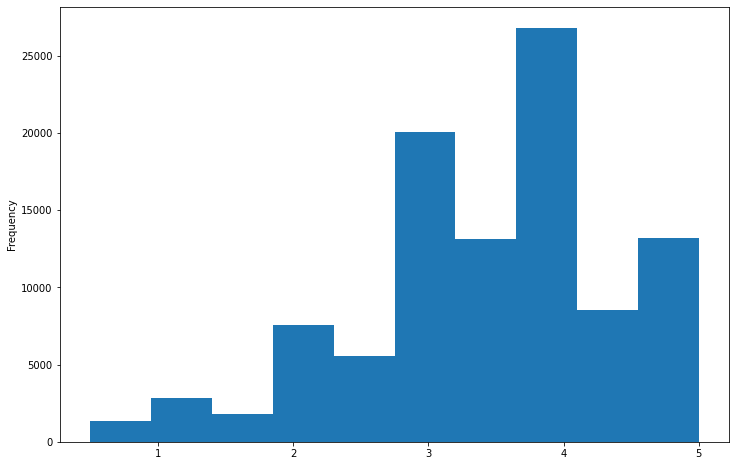

In [27]:
plt.figure(figsize=(12,8))
notas.nota.plot(kind= 'hist')
plt.show()

In [28]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

# Analisando os filmes

In [30]:
filmes = pd.read_csv('movies(1).csv')

In [32]:
filmes.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [33]:
filmes.tail()

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [34]:
filmes.shape

(9742, 3)

In [36]:
filmes.columns = ['filmesId', 'titulo', 'genero']

In [37]:
filmes.columns

Index(['filmesId', 'titulo', 'genero'], dtype='object')

In [38]:
filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filmesId  9742 non-null   int64 
 1   titulo    9742 non-null   object
 2   genero    9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [39]:
filmes['titulo'].value_counts()

Emma (1996)                               2
War of the Worlds (2005)                  2
Confessions of a Dangerous Mind (2002)    2
Eros (2004)                               2
Saturn 3 (1980)                           2
                                         ..
Lost and Delirious (2001)                 1
Rape Me (Baise-moi) (2000)                1
Alice (1990)                              1
Another Woman (1988)                      1
Andrew Dice Clay: Dice Rules (1991)       1
Name: titulo, Length: 9737, dtype: int64

## Analisando notas especificas por filmes

In [40]:
filmes.query('filmesId == 193581')

,filmesId,titulo,genero
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy


In [41]:
notas.query('filmesId == 193581')

,usuarioId,filmesId,nota,momento
27256,184,193581,4.0,1537109082


In [44]:
notas.query('filmesId == 2').nota.mean()

3.4318181818181817

In [46]:
notas.groupby('filmesId').mean()['nota']

filmesId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [48]:
media_notas_filmes = notas.groupby('filmesId').mean().nota

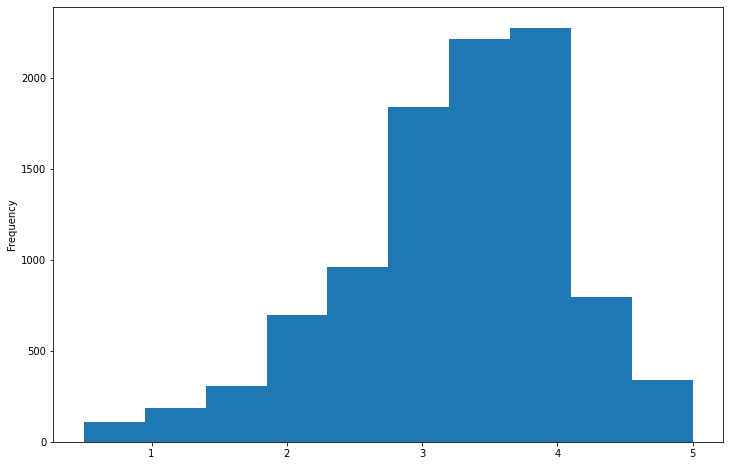

In [53]:
plt.figure(figsize= (12,8))
media_notas_filmes.plot(kind='hist')

In [54]:
media_notas_filmes.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


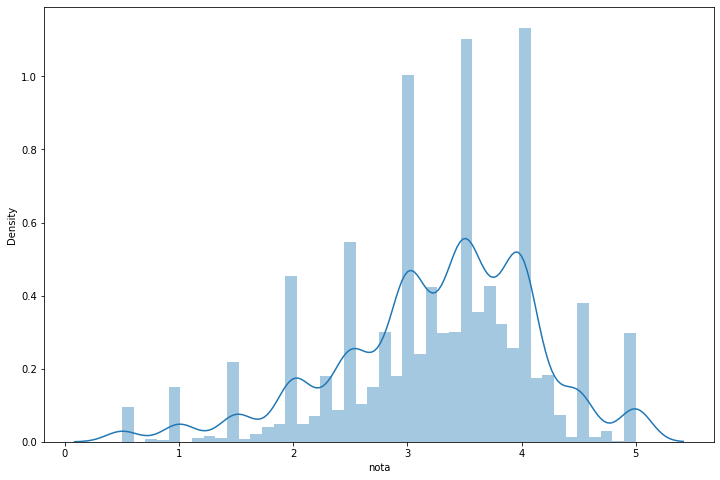

In [59]:
plt.figure(figsize= (12,8))
sns.distplot(media_notas_filmes)
plt.show()

In [60]:
filmes_notas = notas.merge(filmes, how='left', on='filmesId')

In [61]:
filmes_notas.head()

,usuarioId,filmesId,nota,momento,titulo,genero
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [64]:
top_10_filmes = filmes_notas[['titulo','nota']]

In [72]:
top_10_filmes = top_10_filmes.groupby('titulo').sum()
top_10_filmes = top_10_filmes.sort_values('nota', ascending = False).head(10)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

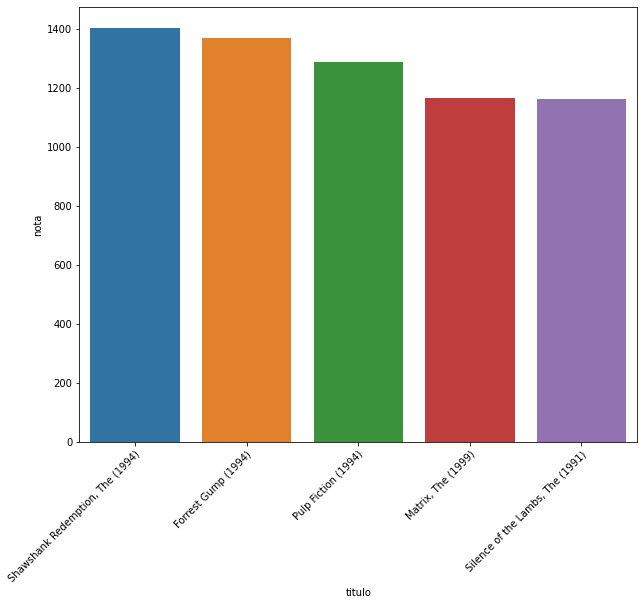

In [75]:
plt.figure(figsize= (10,8))
sns.barplot(data = top_10_filmes, x= top_10_filmes.index, y= top_10_filmes.nota)
plt.xticks(rotation=45, ha='right',rotation_mode='anchor')

In [80]:
top_10_filmes = filmes_notas.drop(filmes_notas[filmes_notas['titulo']== 'Shawshank Redemption, the (1994)'].index).copy()